In [1]:
import itertools
import matplotlib.pyplot as plt 
import pulp

## Strategies

In [2]:
santa = ["rock", "paper", "scissors"]
bunny = ["rock", "paper"]

In [3]:
payoff = [
    [0, 1],
    [-1, 0],
    [1, -1],
]

## Solver

In [ ]:
prob_vars = [pulp.LpVariable(f"p_{i}", lowBound=0) for i in range(len(bunny))]
v = pulp.LpVariable("v") 

In [9]:
prob_vars

[p_0, p_1]

In [25]:
prob = pulp.LpProblem("Bunny_vs_Santa", pulp.LpMinimize)

In [26]:
prob += v

In [27]:
for santa_move in range(len(santa)):
    payoff_expr = 0
    for bunny_move in range(len(bunny)):
        payoff_expr -= payoff[santa_move][bunny_move] * prob_vars[bunny_move]
    prob += (payoff_expr <= v)
    
prob += (pulp.lpSum(prob_vars) == 1)
prob += (prob_vars[0] >= 0)
prob += (prob_vars[1] >= 0)

In [28]:
prob

Bunny_vs_Santa:
MINIMIZE
1*v + 0
SUBJECT TO
_C1: - p_1 - v <= 0

_C2: p_0 - v <= 0

_C3: - p_0 + p_1 - v <= 0

_C4: p_0 + p_1 = 1

_C5: p_0 >= 0

_C6: p_1 >= 0

VARIABLES
p_0 Continuous
p_1 Continuous
v free Continuous

In [29]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /root/miniconda3/envs/py310lin/lib/python3.10/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/17c2dbebf277482e90d51e40b77d79eb-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/17c2dbebf277482e90d51e40b77d79eb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 24 RHS
At line 31 BOUNDS
At line 33 ENDATA
Problem MODEL has 6 rows, 3 columns and 11 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-4) rows, 2 (-1) columns and 4 (-7) elements
0  Obj -0.1 Primal inf 1.199998 (2)
2  Obj 0.33333333
Optimal - objective value 0.33333333
After Postsolve, objective 0.33333333, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0.3333333333 - 2 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):      

1

## Results

In [30]:
for var in prob_vars:
    print(f"{bunny[int(var.name.split('_')[1])]}: probability {var.varValue:.4f}")
print("Game value (expected points):", v.varValue)

rock: probability 0.3333
paper: probability 0.6667
Game value (expected points): 0.33333333


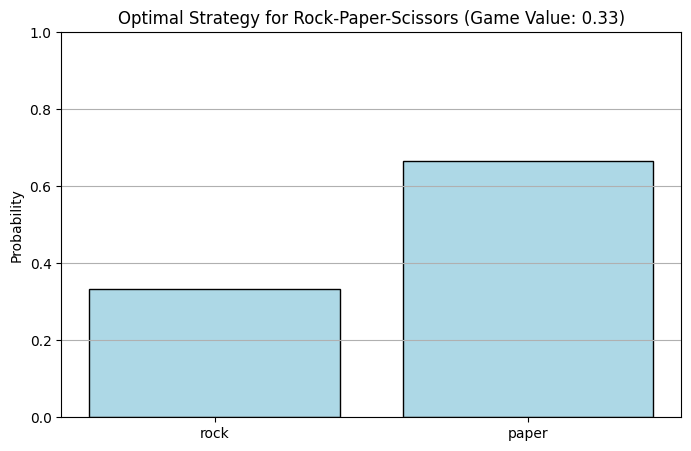

In [31]:
# Plot
strategies = [bunny[int(var.name.split('_')[1])] for var in prob_vars]
probabilities = [var.varValue for var in prob_vars]

plt.figure(figsize=(8,5))
plt.bar(strategies, probabilities, color='lightblue', edgecolor='black')
plt.title(f'Optimal Strategy for Rock-Paper-Scissors (Game Value: {v.varValue:.2f})')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()